In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

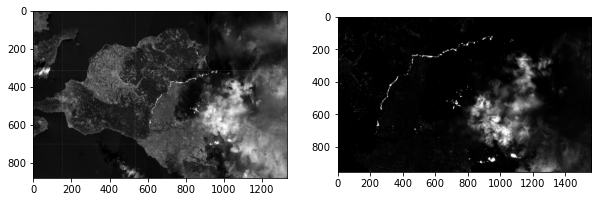

In [6]:
image = cv2.imread('gamma.png')
fire = cv2.imread('fire.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(fire)
ax2.imshow(gray, cmap='gray')

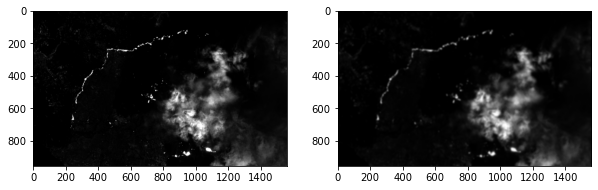

In [18]:
# low pass spatial filter 
# gaussian filters for blurring
gray_blur = cv2.GaussianBlur(gray, (17, 17), cv2.BORDER_DEFAULT)

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(gray, cmap='gray')
ax2.imshow(gray_blur, cmap='gray')

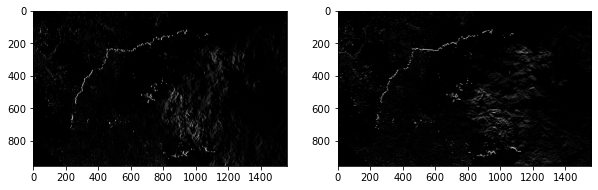

In [8]:
# high pass spatial filters
# sobel filters for edge detection
sobel_y = np.array([[ -1, -2, -1],
                   [ 0, 0, 0],
                   [ 1, 2, 1]])

sobel_x = np.array([[ -1, 0, 1],
                   [ -2, 0, 2],
                   [ -1, 0, 1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image_x = cv2.filter2D(gray, -1, sobel_x)
filtered_image_y = cv2.filter2D(gray, -1, sobel_y)

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(filtered_image_x, cmap='gray')
ax2.imshow(filtered_image_y, cmap='gray')

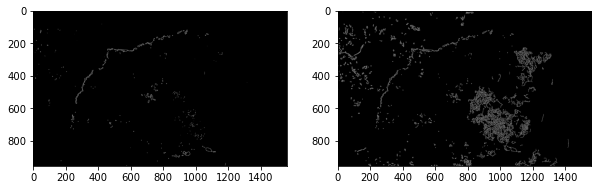

In [23]:
# high pass spatial filter
# canny filter to itensify gradients

wide = cv2.Canny(gray, 30, 100)
tight = cv2.Canny(gray, 230, 250)

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(tight, cmap='gray')
ax2.imshow(wide, cmap='gray')

Text(0.5, 1.0, 'blackhat')

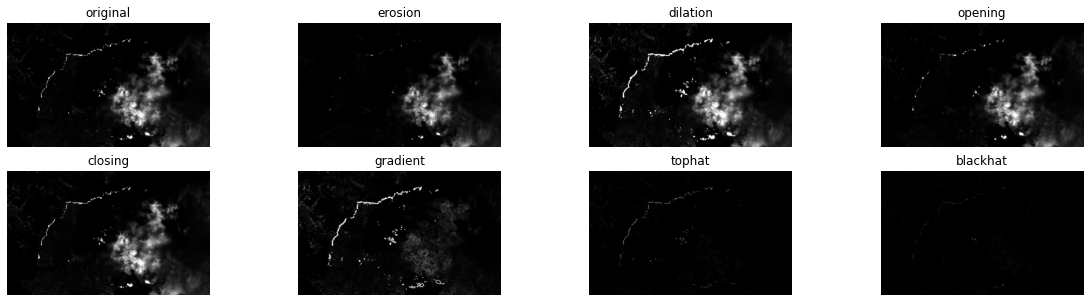

In [39]:
#morphological operations
kernel = np.ones((5,5),np.uint8)

erosion = cv2.erode(gray,kernel,iterations = 1)
dilation = cv2.dilate(gray,kernel,iterations = 1)
opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)


fig = plt.figure(figsize=(20, 5))
rows = 2
columns = 4
fig.add_subplot(rows, columns, 1)
  
plt.imshow(gray, cmap = 'gray')
plt.axis('off')
plt.title("original")
fig.add_subplot(rows, columns, 2)
plt.imshow(erosion, cmap = 'gray')
plt.axis('off')
plt.title("erosion")
fig.add_subplot(rows, columns, 3)
plt.imshow(dilation, cmap = 'gray')
plt.axis('off')
plt.title("dilation")
fig.add_subplot(rows, columns, 4)
plt.imshow(opening, cmap = 'gray')
plt.axis('off')
plt.title("opening")
fig.add_subplot(rows, columns, 5)
plt.imshow(closing, cmap = 'gray')
plt.axis('off')
plt.title("closing")
fig.add_subplot(rows, columns, 6)
plt.imshow(gradient, cmap = 'gray')
plt.axis('off')
plt.title("gradient")
fig.add_subplot(rows, columns, 7)
plt.imshow(tophat, cmap = 'gray')
plt.axis('off')
plt.title("tophat")
fig.add_subplot(rows, columns, 8)
plt.imshow(blackhat, cmap = 'gray')
plt.axis('off')
plt.title("blackhat")

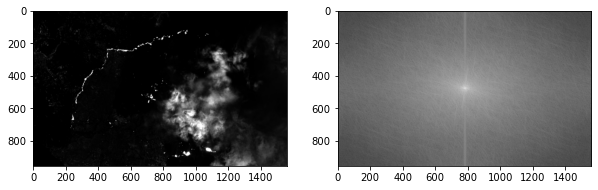

In [41]:
def ft_image(norm_image):
    '''This function takes in a normalized, grayscale image
       and returns a frequency spectrum transform of that image. '''
    f = np.fft.fft2(norm_image)
    fshift = np.fft.fftshift(f)
    frequency_tx = 20 * np.log(np.abs(fshift))

    return frequency_tx


freq_fire = ft_image(gray/255.0)

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(gray, cmap='gray')
ax2.imshow(freq_fire, cmap='gray')